In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('garments_worker_productivity.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()

print(df.columns)

df_info = df.info()
print(df_info)

df_describe = df.describe()
print(df_describe)

df.isnull().sum()
df_cleaned = df.dropna()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['department_encoded'] = label_encoder.fit_transform(df['department'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

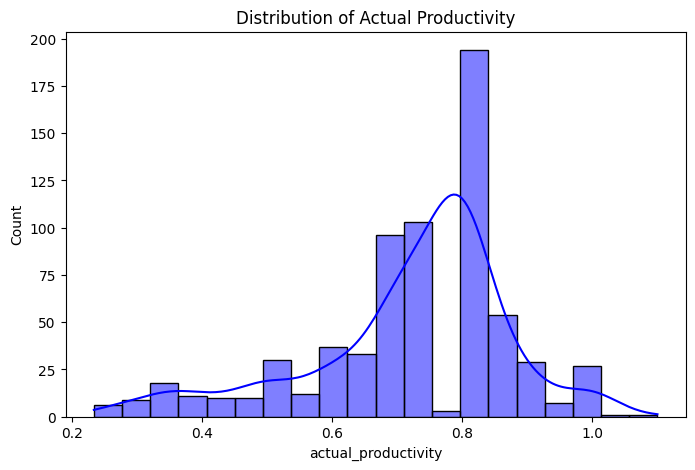

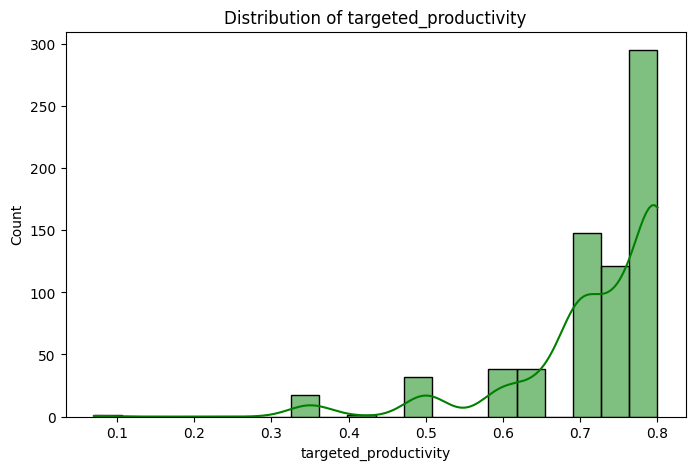

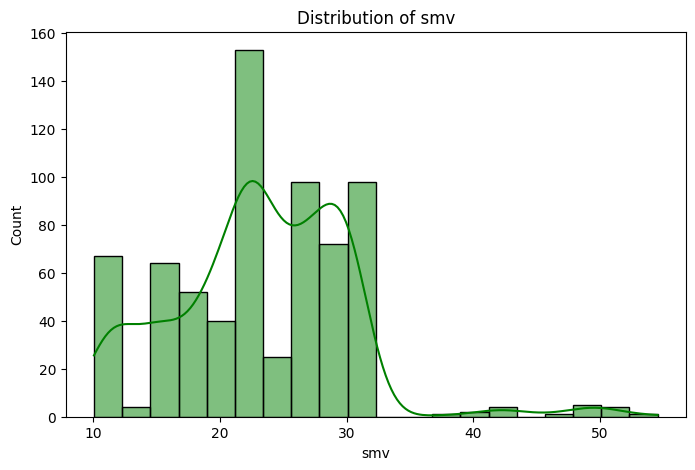

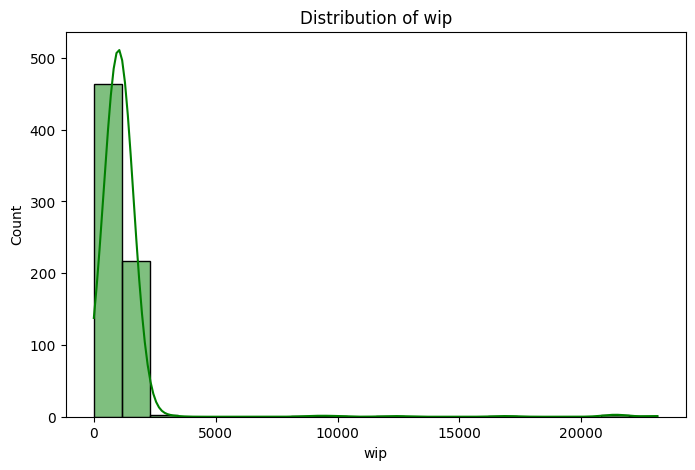

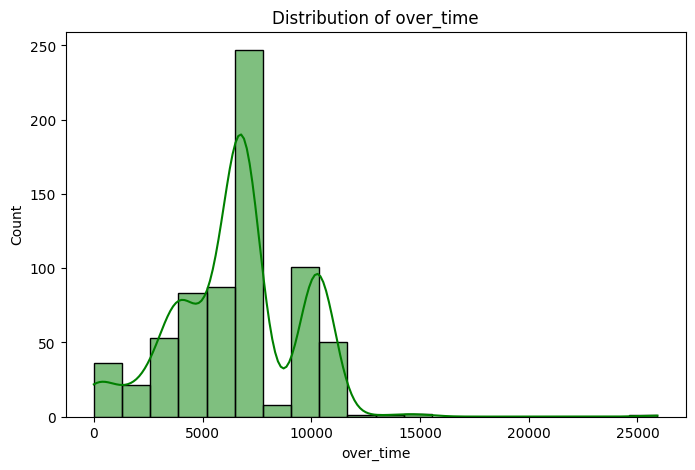

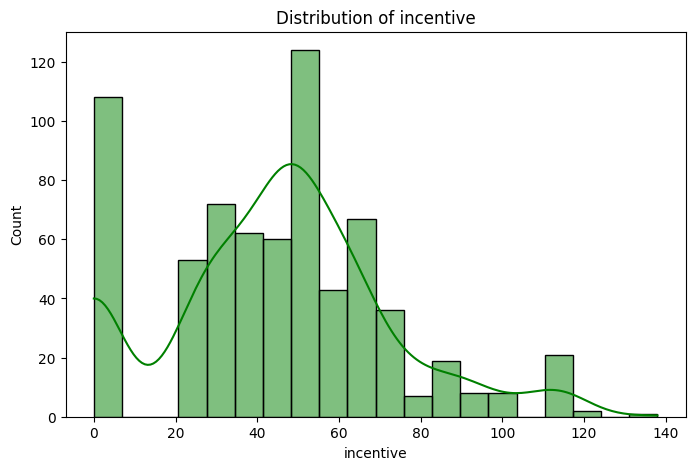

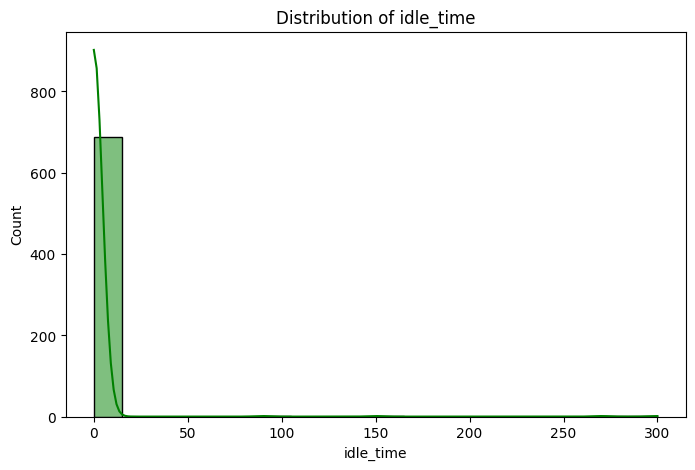

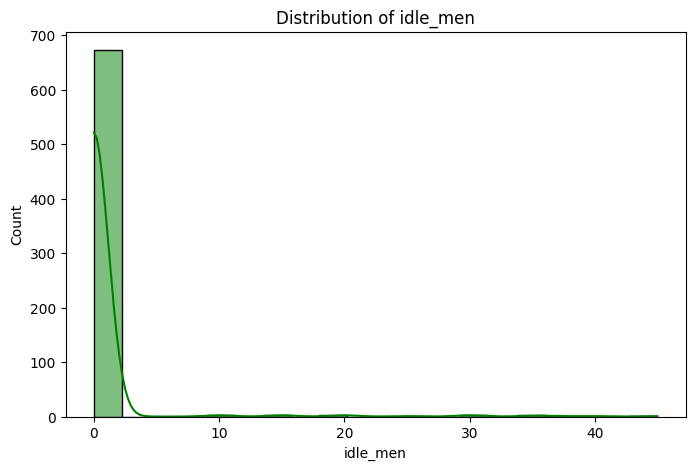

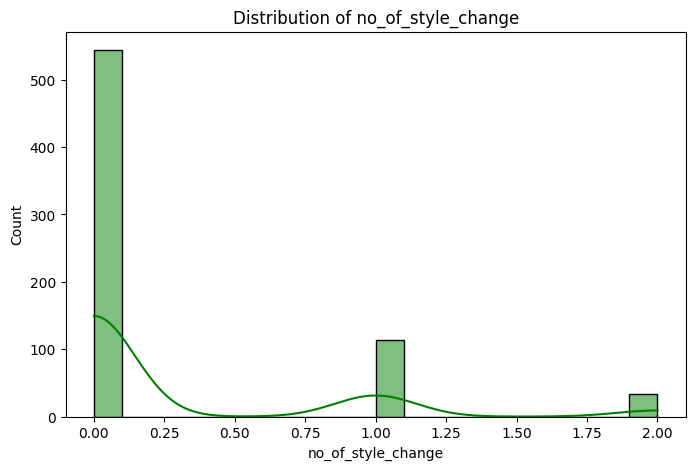

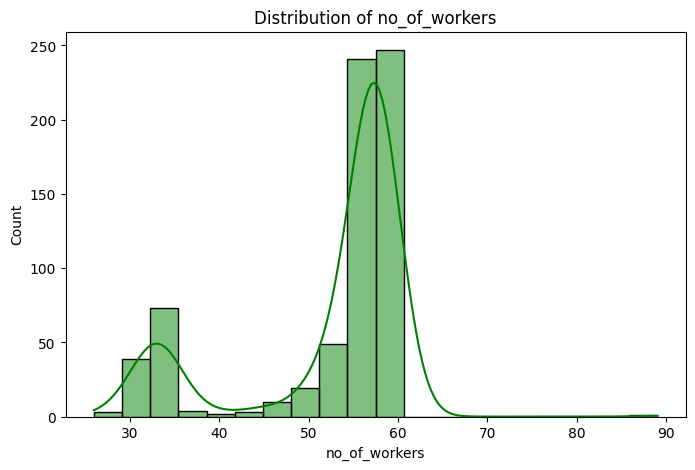

In [ ]:

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['actual_productivity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Actual Productivity')
plt.show()

numerical_columns = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[column], bins=20, kde=True, color='green')
    plt.title(f'Distribution of {column}')
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_24600\688579077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned[column], palette='viridis')


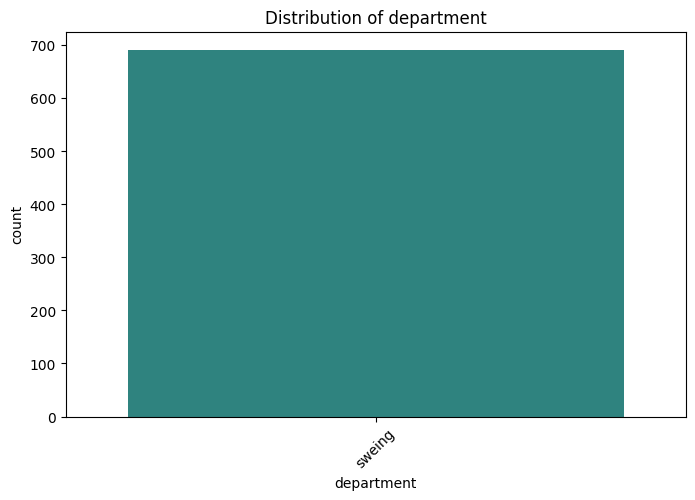

C:\Users\hp\AppData\Local\Temp\ipykernel_24600\688579077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned[column], palette='viridis')


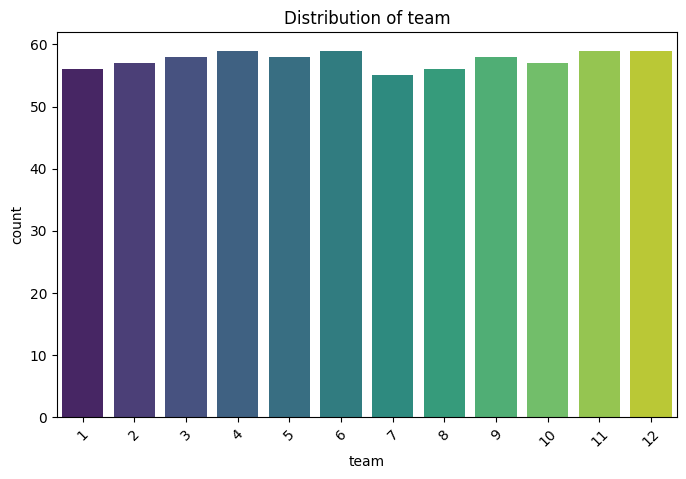

In [ ]:
categorical_columns = ['department', 'team']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df_cleaned[column], palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def prepare_data(df, target_column, drop_columns):
    X = df.drop(columns=[target_column] + drop_columns)  
    y = df[target_column]

    X = X.select_dtypes(include=[np.number])

    X = X.fillna(X.mean())
    y = y.fillna(y.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Performance of {model_name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}\n")
    
    return model, y_pred

def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Model saved as {filename}\n")

def load_model(filename):
    model = joblib.load(filename)
    print(f"Model loaded from {filename}\n")
    return model

def apply_all_models(df, target_column, drop_columns):
    X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data(df, target_column, drop_columns)
    
    models = [
        (LinearRegression(), 'Linear Regression'),
        (DecisionTreeRegressor(), 'Decision Tree Regressor'),
        (RandomForestRegressor(), 'Random Forest Regressor'),
        (SVR(), 'Support Vector Regressor'),
        (XGBRegressor(), 'XGBoost Regressor')
    ]
    
    for model, name in models:
        trained_model, predictions = train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
        
        save_model(trained_model, f"{name.replace(' ', '_')}_model.pkl")
      
        predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
        predictions_df.to_csv(f"{name.replace(' ', '_')}_predictions.csv", index=False)

target_column = 'actual_productivity'
drop_columns = ['date', 'day']  

apply_all_models(df, target_column, drop_columns)



Performance of Linear Regression:
Mean Squared Error: 0.021559156268205534
R2 Score: 0.18805447889268334

Model saved as Linear_Regression_model.pkl

Performance of Decision Tree Regressor:
Mean Squared Error: 0.013753587817861871
R2 Score: 0.48202221418386737

Model saved as Decision_Tree_Regressor_model.pkl

Performance of Random Forest Regressor:
Mean Squared Error: 0.012101381364514342
R2 Score: 0.5442464317298257

Model saved as Random_Forest_Regressor_model.pkl

Performance of Support Vector Regressor:
Mean Squared Error: 0.01626671234540183
R2 Score: 0.3873747159823594

Model saved as Support_Vector_Regressor_model.pkl

Performance of XGBoost Regressor:
Mean Squared Error: 0.013929546351870636
R2 Score: 0.4753953897473414

Model saved as XGBoost_Regressor_model.pkl



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

model_results = []

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    model_results.append({
        'Model': model_name,
        'MAE' : mae, 
        'RMSE' : rmse,
        'R² Score': r2
    })
    
    return mae, rmse, r2

def hyperparameter_tuning(X_train, y_train, X_test, y_test):
    rf_model = RandomForestRegressor(random_state=42)
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
    rf_grid_search.fit(X_train, y_train)
    rf_best_model = rf_grid_search.best_estimator_

    print("Random Forest Model Evaluation:")
    mae, rmse, r2 = evaluate_model(rf_best_model, X_test, y_test, 'Random Forest')
    print(f"Random Forest - MAE: {mae}, RMSE: {rmse}, R²: {r2}")
    
    
    xgb_model = XGBRegressor(random_state=42)
    xgb_param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    
    xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
    xgb_grid_search.fit(X_train, y_train)
    xgb_best_model = xgb_grid_search.best_estimator_
    
    print("XGBoost Model Evaluation:")
    mae, rmse, r2 = evaluate_model(xgb_best_model, X_test, y_test, 'XGBoost')
    print(f"XGBoost - MAE: {mae}, RMSE: {rmse}, R²: {r2}")


    return rf_best_model, xgb_best_model

target_column = 'actual_productivity'
drop_columns = ['date', 'day']  
X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data(df, target_column, drop_columns)

rf_best_model, xgb_best_model = hyperparameter_tuning(X_train_scaled, y_train, X_test_scaled, y_test)

save_model(rf_best_model, 'best_random_forest_model.pkl')
save_model(xgb_best_model, 'best_xgboost_model.pkl')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Model Evaluation:
Random Forest - MAE: 0.06877674344063568, RMSE: 0.10888743660531568, R²: 0.5534699633297935
Fitting 5 folds for each of 108 candidates, totalling 540 fits
XGBoost Model Evaluation:
XGBoost - MAE: 0.07509043845319686, RMSE: 0.11571376975333879, R²: 0.49572758151798835
Model saved as best_random_forest_model.pkl

Model saved as best_xgboost_model.pkl



<Figure size 1000x600 with 0 Axes>

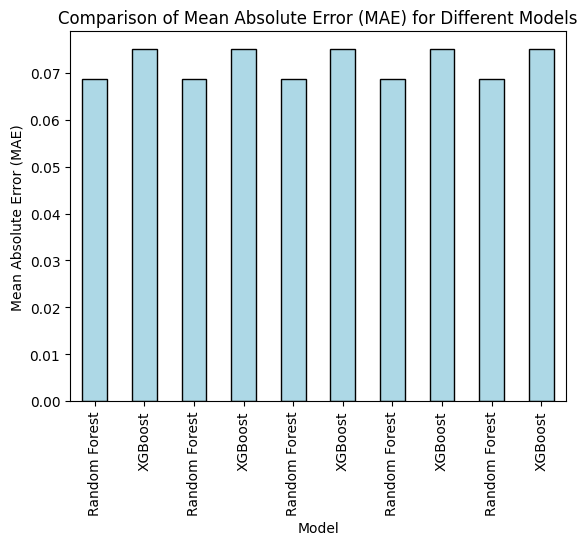

<Figure size 1000x600 with 0 Axes>

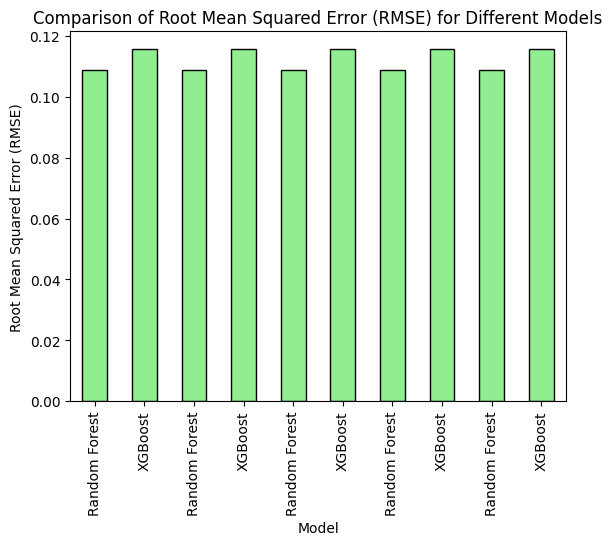

<Figure size 1000x600 with 0 Axes>

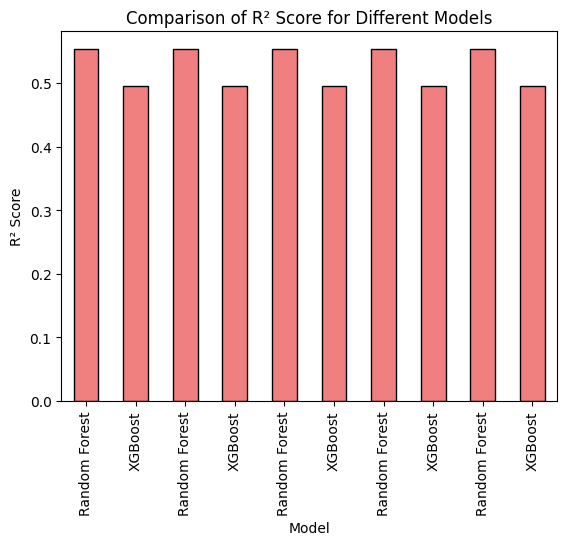

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Model Evaluation:
Random Forest - MAE: 0.06877674344063568, RMSE: 0.10888743660531568, R²: 0.5534699633297935
Fitting 5 folds for each of 108 candidates, totalling 540 fits
XGBoost Model Evaluation:
XGBoost - MAE: 0.07509043845319686, RMSE: 0.11571376975333879, R²: 0.49572758151798835


<Figure size 1000x600 with 0 Axes>

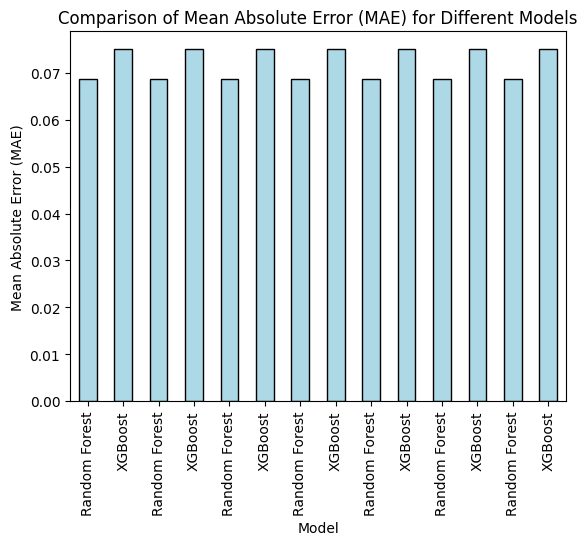

<Figure size 1000x600 with 0 Axes>

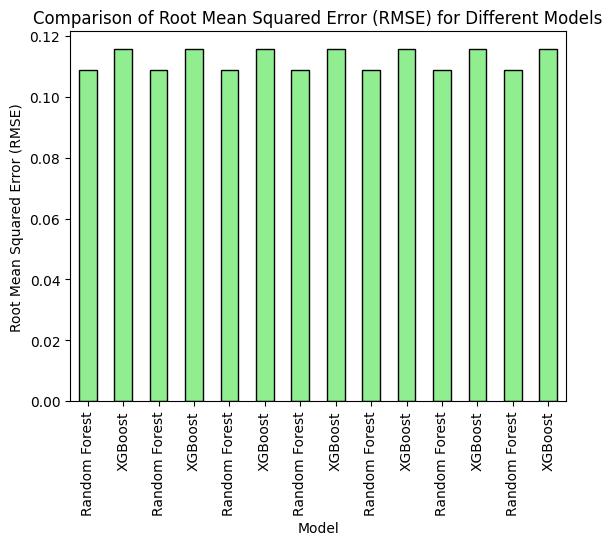

<Figure size 1000x600 with 0 Axes>

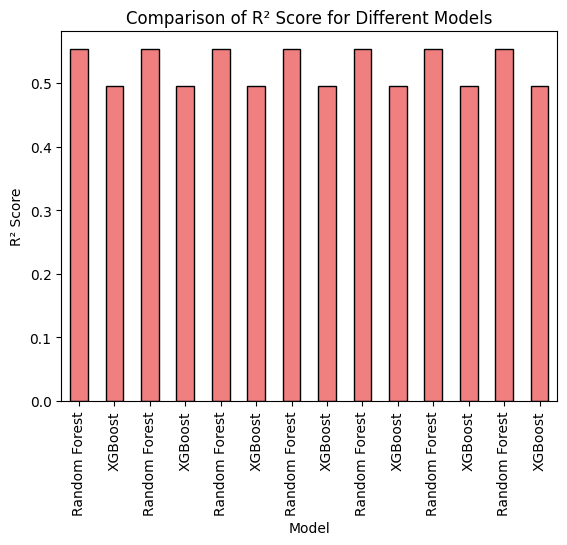

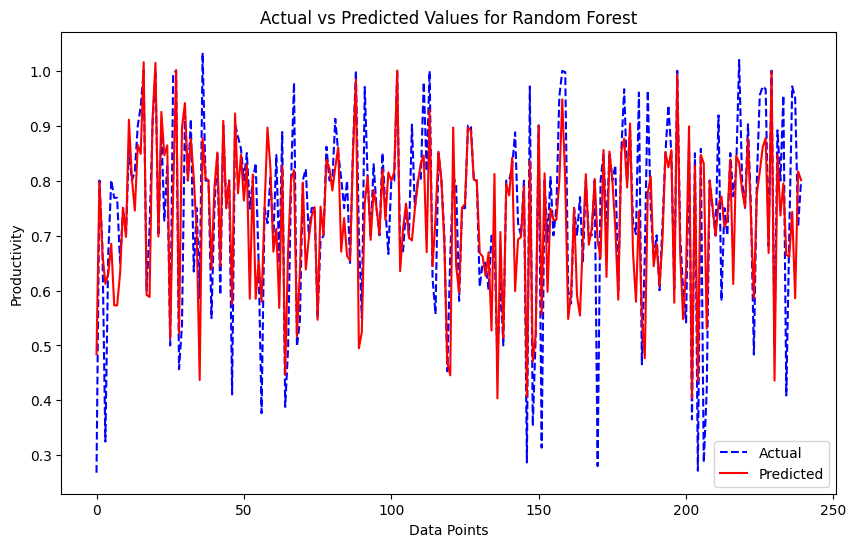

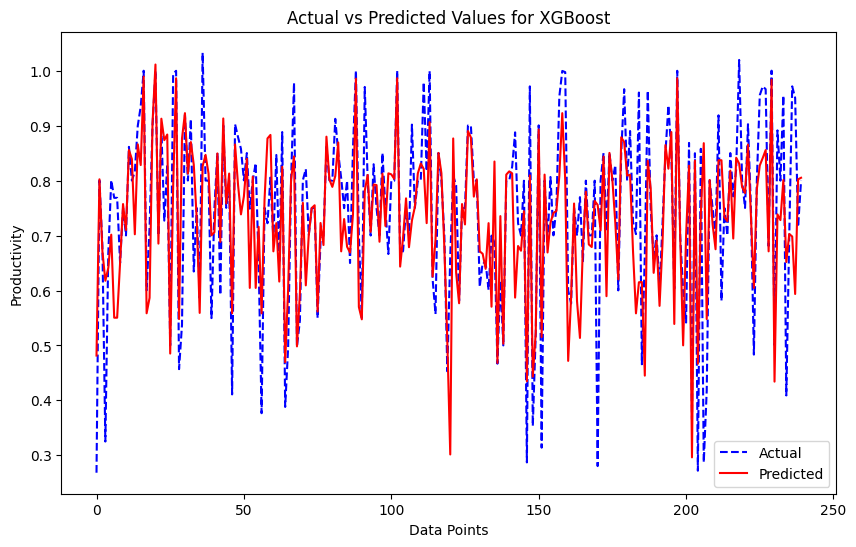

Model Comparison Table:
            Model       MAE      RMSE  R² Score
0   Random Forest  0.068777  0.108887  0.553470
1         XGBoost  0.075090  0.115714  0.495728
2   Random Forest  0.068777  0.108887  0.553470
3         XGBoost  0.075090  0.115714  0.495728
4   Random Forest  0.068777  0.108887  0.553470
5         XGBoost  0.075090  0.115714  0.495728
6   Random Forest  0.068777  0.108887  0.553470
7         XGBoost  0.075090  0.115714  0.495728
8   Random Forest  0.068777  0.108887  0.553470
9         XGBoost  0.075090  0.115714  0.495728
10  Random Forest  0.068777  0.108887  0.553470
11        XGBoost  0.075090  0.115714  0.495728
12  Random Forest  0.068777  0.108887  0.553470
13        XGBoost  0.075090  0.115714  0.495728


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_comparison_bar_plots(model_results):
    results_df = pd.DataFrame(model_results)
    
    plt.figure(figsize=(10, 6))
    results_df.plot(kind='bar', x='Model', y='MAE', legend=False, color='lightblue', edgecolor='black')
    plt.title('Comparison of Mean Absolute Error (MAE) for Different Models')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.show()

    plt.figure(figsize=(10, 6))
    results_df.plot(kind='bar', x='Model', y='RMSE', legend=False, color='lightgreen', edgecolor='black')
    plt.title('Comparison of Root Mean Squared Error (RMSE) for Different Models')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.show()

    plt.figure(figsize=(10, 6))
    results_df.plot(kind='bar', x='Model', y='R² Score', legend=False, color='lightcoral', edgecolor='black')
    plt.title('Comparison of R² Score for Different Models')
    plt.ylabel('R² Score')
    plt.show()

plot_comparison_bar_plots(model_results)

def plot_prediction_trends(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    plt.figure(figsize=(10, 6))
    plt.plot(comparison_df['Actual'].values, label='Actual', color='blue', linestyle='--')
    plt.plot(comparison_df['Predicted'].values, label='Predicted', color='red', linestyle='-')
    plt.title(f'Actual vs Predicted Values for {model_name}')
    plt.xlabel('Data Points')
    plt.ylabel('Productivity')
    plt.legend()
    plt.show()


def display_comparison_table():
    results_df = pd.DataFrame(model_results)
    
    print("Model Comparison Table:")
    print(results_df)

rf_best_model, xgb_best_model = hyperparameter_tuning(X_train_scaled, y_train, X_test_scaled, y_test)

evaluate_model(rf_best_model, X_test_scaled, y_test, 'Random Forest')
evaluate_model(xgb_best_model, X_test_scaled, y_test, 'XGBoost')

plot_comparison_bar_plots(model_results)

plot_prediction_trends(rf_best_model, X_test_scaled, y_test, 'Random Forest')
plot_prediction_trends(xgb_best_model, X_test_scaled, y_test, 'XGBoost')

display_comparison_table()